# Project 3: Movielens Case Study

In [11]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### Import three data set

In [12]:
warnings.simplefilter('ignore')
movies_data = pd.read_csv("movies.dat",
                       sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python',encoding='ISO-8859-1')
users_data = pd.read_csv("users.dat",
                       sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat",
                       sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')

### Merging the three datasets

In [13]:
ratings_movie = pd.merge(movies_data,ratings_data,how='inner',on=['MovieID'])

In [14]:
ratings_user = pd.merge(ratings_movie,users_data,how='inner',on=['UserID'])

In [15]:
master_data = ratings_user[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]
master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5


In [16]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int32 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int32 
 3   Age         1000209 non-null  int32 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int32 
 6   Rating      1000209 non-null  int32 
dtypes: int32(5), object(2)
memory usage: 42.0+ MB


In [17]:
master_data.duplicated().sum()

0

# Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
## 1. User Age Distribution

In [19]:
age_dist=master_data['Age'].value_counts().to_frame()
age_dist.sort_index(inplace=True)
age_dist

,Age
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


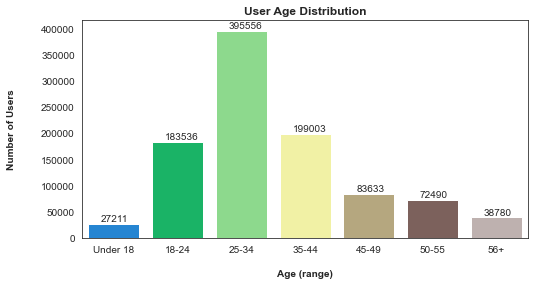

In [20]:
plt.figure(figsize=(8,4))
txt={'weight':'bold'}
sns.set_style('white')
sns.countplot(x='Age',data=master_data,palette="terrain")
plt.title('User Age Distribution',fontdict=txt)
plt.xlabel("Age (range)",fontdict=txt, labelpad=15)
plt.ylabel("Number of Users",fontdict=txt, labelpad=25)
plt.xticks([0,1,2,3,4,5,6],["Under 18","18-24","25-34","35-44","45-49","50-55","56+"])
for i in range(7):
    plt.annotate(age_dist['Age'].iloc[i],xy=(i-0.2,age_dist['Age'].iloc[i]+5000),size=10)
plt.show()

#### Comment : Most of the users are between the age 25-34

## 2. User rating of the movie “Toy Story”

In [ ]:
ts_df = master_data[master_data['Title'] == "Toy Story (1995)"]
ts_rating = ts_df['Rating'].value_counts()
ts_rating

In [ ]:
plt.figure(figsize=(8,8))
txt={'weight':'bold','size':14}
cmap = plt.get_cmap('terrain')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc09','#c2c2f0']
labels = ['Rating 4','Rating 5','Rating 3','Rating 2','Rating 1']
plt.title("User Rating of Movie Toy Story", fontdict=txt)
plt.pie(ts_rating, labels=labels, wedgeprops={'linewidth':7,'edgecolor':'white'},autopct="%.1f%%",textprops=txt,colors=colors)
my_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle) 
plt.show()

### Comment : Most of the users gaves the rating of 4 followed by rating 5

## 3. Top 25 movies by viewership rating

In [ ]:
tm_df=pd.DataFrame(master_data.groupby('Title')['Rating'].agg('mean')).sort_values(by='Rating',ascending=False).head(25)
tm_df['Title']=tm_df.index
tm_df.index=range(1,26)
tm_df[['Title','Rating']]

### Comment : Top 10 movies are got the Rating of 5

## 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [ ]:
uid_2696=master_data[master_data['UserID']==2696]
uid_2696 = uid_2696.sort_values('Rating',ascending=False,ignore_index=True)
uid_2696[['MovieID','Rating','Title']]

In [ ]:
plt.scatter(x=uid_2696['MovieID'],y=uid_2696['Rating'])
plt.title('Movies Reviwed By UserID 2696')
plt.show()

### Comment : Most of his ratings are 4 and this user has rated 5 to the movie titled "Lone Star (1996)"

# Feature Engineering:
## 1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [ ]:
# Storing Generes column to a variable names genre
genre = ratings_user['Genres']
genre.head()

In [ ]:
# For loop to store the splitted genre data and append to list
list1=[]
for row in genre:
    row_list = row.split("|")
    for i in range(len(row_list)):
        list1.append(row_list[i])

In [ ]:
# Finding unique genres and number of unique genres
unique_genre = list(set(list1))
print(unique_genre)
print()
print("Total Unique Genres :",len(unique_genre))

## 2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [ ]:
# Creating a new variable onehotcode to perform onehotencoding
onehotcode = ratings_user.copy()
onehotcode.head(3)

In [ ]:
# Converting categorical variable to numerical variable
dummy = onehotcode['Genres'].str.get_dummies()
dummy.head(3)

In [ ]:
# Merging the final dataset with newly created onehotcode based on index
final_ds=pd.merge(onehotcode,dummy,how='inner',left_index=True,right_index=True)
final_ds.head(3)

## 3. Determine the features affecting the ratings of any particular movie.

In [ ]:
# Converting categorical column "Gender" into numerical column
gender_dummy = final_ds['Gender'].str.get_dummies()

In [ ]:
# Merging the new numerical column to final dataset based on index
final_ds = pd.merge(final_ds,gender_dummy,how='inner',left_index=True,right_index=True)
final_ds.head(3)

In [ ]:
# Heatmap
m = np.ones_like(final_ds[['MovieID','UserID','Timestamp','Age','F','M','Occupation','Rating']].corr())
m[np.tril_indices_from(m)]=0
sns.set_style("white")
plt.figure(figsize=(8,8))
sns.heatmap(final_ds[['MovieID','UserID','Timestamp','Age','F','M','Occupation','Rating']].corr(),annot=True,cmap="Set3",mask=m)
plt.show()

In [ ]:
# Creating a new dataframe with only continous data and dummies
features = final_ds[['MovieID','UserID','F','M','Timestamp','Age','Occupation','Action','Adventure','Animation',"Children's",'Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western','Rating']]                       

In [ ]:
# Storing features and target variable
x = features.drop(['Rating'],axis=1)
y = features['Rating']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Selecting best 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(10,'Score'))

In [ ]:
# Store feature selection in DataFrame
feature_df = features[['Timestamp','MovieID','UserID','Age','Drama','Horror','War','Film-Noir','Sci-Fi','Action']]
feature_df

## 4. Develop an appropriate model to predict the movie ratings

In [ ]:
# First 500 Extracted Records
f_500=master_data[:1000]
f_500

In [ ]:
features = f_500[['MovieID','Age','Occupation']].values
labels = f_500[['Rating']].values

In [ ]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

In [ ]:
# Support Vector Machines
svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

In [ ]:
# K Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)